In [46]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [47]:
salaries = pd.read_csv('core/Salaries.csv')
battingTotals = pd.read_csv('core/Batting.csv')
players = pd.read_csv('core/People.csv')
pitching = pd.read_csv('core/Pitching.csv')

## data for salaries begins in 1985, so cut off everything in batting totals before then for batting


battingTotals = battingTotals[battingTotals.yearID >= 1985]

#display(battingTotals[battingTotals.playerID == 'zupofr01'])


,bats,salary
0,B,1.178583e+07
1,L,1.142119e+07
2,R,1.024259e+07


<Axes: xlabel='H', ylabel='salary'>

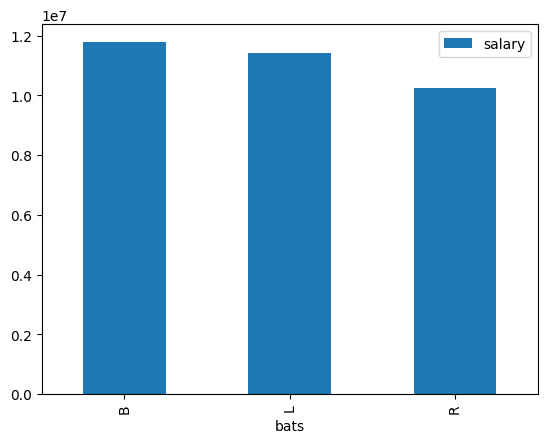

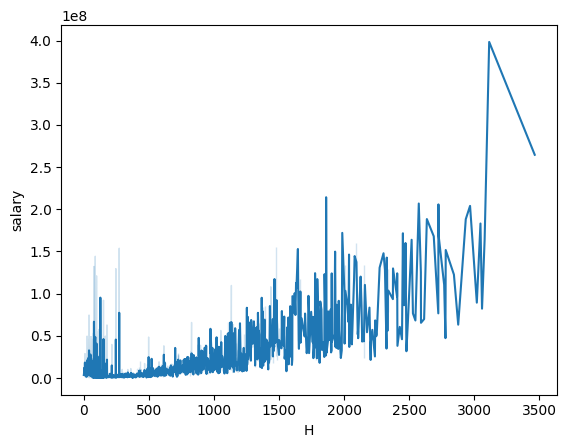

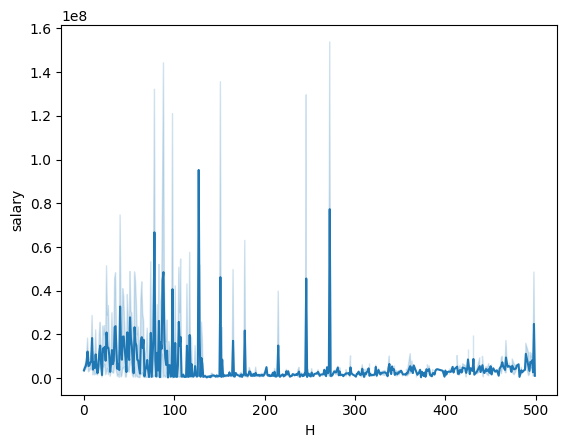

In [48]:
salariesPerPlayer = salaries.groupby('playerID').agg({'salary':'sum'}).reset_index()

players = players[['playerID', 'bats', 'throws']]

battingPerYear = battingTotals[['playerID', 'H', 'yearID']]

battingPerPlayer = battingPerYear.groupby('playerID').agg({'H':'sum'}).reset_index()

salariesAndHits = pd.merge(battingPerPlayer, salariesPerPlayer, on='playerID')

## Average salary per type of at bat player (L or R or B)
averageSalary = pd.merge(salariesPerPlayer, players, on='playerID')
averageSalary = averageSalary.groupby('bats').agg({'salary':'mean'}).reset_index()
display(averageSalary)
averageSalary.plot.bar(x='bats', y='salary')
plt.figure()

#display(salariesAndHits)

## line plot for salaries and hits
sns.lineplot(x='H', y='salary', data=salariesAndHits)


#sns.scatterplot(x='playerID', y='salary', data=totalPlayerSalaries)

## line plot for salaries and hits where hits are less than 500
lowerHits = salariesAndHits[salariesAndHits.H < 500]
plt.figure()
sns.lineplot(x='H',y='salary', data=lowerHits)



In [49]:
pitching = pitching[pitching.yearID >= 1985]

pitchingPerPlayer = pitching.groupby('playerID').agg({'SO' : 'sum', 'W':'sum', 'GS':'sum'}).reset_index()

salariesAndPitches = pd.merge(pitchingPerPlayer, salariesPerPlayer, on='playerID')

# sns.lineplot(x='SO', y='salary', data=salariesAndPitches)
# plt.figure()
# sns.lineplot(x='W', y='SO', data=salariesAndPitches)
# plt.figure()
# sns.scatterplot(x='W', y='salary', data=salariesAndPitches)


## Definition of wins for a pitcher: Credited to the pitcher whose teams assumes a lead while such pitcher is in the game and does not relinquish such lead unless otherwise assigned by the official scorer.


# hitsAndStrikeoutsAndSalary = pd.merge(lowerHits, salariesAndPitches, on='playerID')
# plt.figure()
# sns.lineplot(x='H', y = 'SO', data=hitsAndStrikeoutsAndSalary)
# display(hitsAndStrikeoutsAndSalary)
# display(hitsAndStrikeoutsAndSalary[(hitsAndStrikeoutsAndSalary.SO > 3000) & (hitsAndStrikeoutsAndSalary.H > 250)])


